In [1]:
# Pandas for dataframe and data manipulation
import pandas as pd
import numpy as np

# Matplotlib for plotting/visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For data preprocessing
from sklearn import preprocessing
label = preprocessing.LabelEncoder()    # for encoding text data

# For data scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# For splitting data into training and testing sets
# For model performance evaluation
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

In [2]:
# load the dataset
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset/Fiverr/second_dataset_82.xlsx")

In [3]:
df.head(5)

,Samples,Gender,Age_Group,ABCC6,ACBD5,AFG3L2,AIPL1,ALMS1,APOD,APOE,...,SDCCAG8,TIMP3,TSPAN12,TTC8,TUBGCP4,TUBGCP6,USH2A,VEGFA,WDPCP,Class
0,1_50:60_F,Female,50-60,64.6,253.0,92.0,151.0,114.0,104.2,95.6,...,192.0,156.4,163.2,220.0,182.0,124.0,275.0,73.0,165.0,Latent
1,2_50:60_F,Female,50-60,76.0,239.0,76.8,150.0,120.0,104.2,86.0,...,203.0,159.0,145.0,228.4,200.0,113.0,251.0,67.0,159.0,Latent
2,3_40:50_F,Female,40-50,55.0,257.0,79.8,144.0,131.0,117.0,97.8,...,198.0,159.0,174.0,231.0,188.0,136.0,255.0,72.0,162.0,Latent
3,4_40:50_F,Female,40-50,70.0,228.0,72.0,145.0,140.0,104.0,96.0,...,183.0,164.2,153.4,236.4,188.0,119.0,260.4,71.0,184.0,Latent
4,5_50:60_F,Female,50-60,74.2,250.8,67.0,161.6,113.0,92.0,95.2,...,194.8,160.0,172.0,226.6,196.0,117.0,257.0,68.0,170.0,Latent


In [4]:
df.tail()

,Samples,Gender,Age_Group,ABCC6,ACBD5,AFG3L2,AIPL1,ALMS1,APOD,APOE,...,SDCCAG8,TIMP3,TSPAN12,TTC8,TUBGCP4,TUBGCP6,USH2A,VEGFA,WDPCP,Class
495,235_50:60_M,Male,50-60,79.6,241.0,78.6,147.0,121.6,83.4,78.0,...,191.0,180.2,165.0,243.0,201.6,118.0,258.2,87.0,174.0,Active
496,236_40:50_M,Male,40-50,78.0,247.4,72.0,153.2,124.6,75.0,85.0,...,175.8,186.0,171.4,241.0,201.0,112.0,256.0,88.4,166.0,Active
497,237_50:60_M,Male,50-60,79.4,260.0,87.6,139.0,125.8,89.0,81.0,...,170.0,174.0,190.0,229.4,197.8,131.0,256.0,96.0,162.0,Active
498,238_40:50_M,Male,40-50,74.6,240.0,80.0,136.0,142.0,88.0,88.4,...,189.0,182.0,172.0,238.0,198.4,104.0,259.0,78.0,181.0,Latent
499,239_50:60_M,Male,50-60,67.0,238.0,94.0,145.0,122.0,87.8,81.0,...,181.0,185.0,170.0,251.0,199.6,108.0,250.8,81.0,165.0,Normal


In [5]:
print(df.shape)   # dataset rows & columns
df.columns        # columns of the dataset

(500, 86)


Index(['Samples', 'Gender', 'Age_Group', 'ABCC6', 'ACBD5', 'AFG3L2', 'AIPL1',
       'ALMS1', 'APOD', 'APOE', 'ARL2BP', 'ARL6', 'ARMS2', 'ARSG', 'BBS10',
       'BBS2', 'BEST1', 'C2', 'C3', 'C8orf37', 'CABP4', 'CACNA1F', 'CAPN5',
       'CC2D2A', 'CFB', 'CFD', 'CFHR1', 'CHM', 'CLCC1', 'CLN3', 'CLRN1',
       'CLUAP1', 'CNGB3', 'CNNM4', 'COX2', 'CYSLT1R', 'ESPN', 'GRK1', 'GUCY2D',
       'HGSNAT', 'HMCN1', 'IFT27', 'IMPG1', 'ITM2B', 'KLHL7', 'LCA5', 'LRAT',
       'LRP5', 'LTB4R', 'LTE4', 'LZTFL1', 'MYO7A', 'NDP', 'NEK2', 'NPHP1',
       'NR2E3', 'NRL', 'PCARE', 'PCDH15', 'PDE6B', 'PDE6C', 'PDZD7', 'PEX7',
       'POC1B', 'PRDM13', 'PROM1', 'PRPF4', 'RB1', 'RDH5', 'REEP6', 'RGR',
       'RGS9BP', 'RLBP1', 'RP1L1', 'RPGR', 'SAG', 'SDCCAG8', 'TIMP3',
       'TSPAN12', 'TTC8', 'TUBGCP4', 'TUBGCP6', 'USH2A', 'VEGFA', 'WDPCP',
       'Class'],
      dtype='object')

In [6]:
# looking for duplicate values
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 86 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Samples    500 non-null    object 
 1   Gender     500 non-null    object 
 2   Age_Group  500 non-null    object 
 3   ABCC6      500 non-null    float64
 4   ACBD5      500 non-null    float64
 5   AFG3L2     500 non-null    float64
 6   AIPL1      500 non-null    float64
 7   ALMS1      500 non-null    float64
 8   APOD       500 non-null    float64
 9   APOE       500 non-null    float64
 10  ARL2BP     500 non-null    float64
 11  ARL6       500 non-null    float64
 12  ARMS2      500 non-null    float64
 13  ARSG       500 non-null    float64
 14  BBS10      500 non-null    float64
 15  BBS2       500 non-null    float64
 16  BEST1      500 non-null    float64
 17  C2         500 non-null    float64
 18  C3         500 non-null    float64
 19  C8orf37    500 non-null    float64
 20  CABP4     

In [8]:
df.describe().T       # columns statistical analysis

,count,mean,std,min,25%,50%,75%,max
ABCC6,500.0,73.0436,8.142948,53.0,67.00,72.8,78.4,93.0
ACBD5,500.0,244.5780,7.159824,228.0,240.55,244.8,249.0,261.0
AFG3L2,500.0,81.7380,7.714905,65.0,76.00,81.7,87.0,99.0
AIPL1,500.0,152.7404,9.305549,133.0,145.60,153.0,159.2,172.0
ALMS1,500.0,127.2232,7.399557,112.0,122.00,127.2,132.4,142.0
...,...,...,...,...,...,...,...,...
TUBGCP4,500.0,194.8428,8.834212,176.0,188.00,195.0,201.6,213.0
TUBGCP6,500.0,123.4980,8.535715,104.0,117.00,123.7,129.6,142.0
USH2A,500.0,259.8312,8.760486,242.0,253.00,259.2,267.0,279.0
VEGFA,500.0,81.0864,10.932237,58.0,73.90,81.0,88.0,106.0


In [9]:
df.value_counts('Class')

,count
Class,
Active,233
Latent,181
Normal,86


<ipython-input-10-e6c3b432462b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='Dark2')


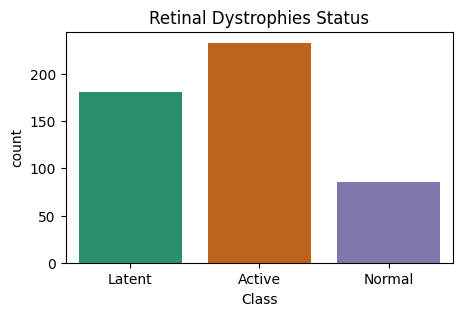

In [10]:
# Count plot for target column
plt.figure(figsize=(5, 3))
sns.countplot(x='Class', data=df, palette='Dark2')
plt.title('Retinal Dystrophies Status')
plt.show()


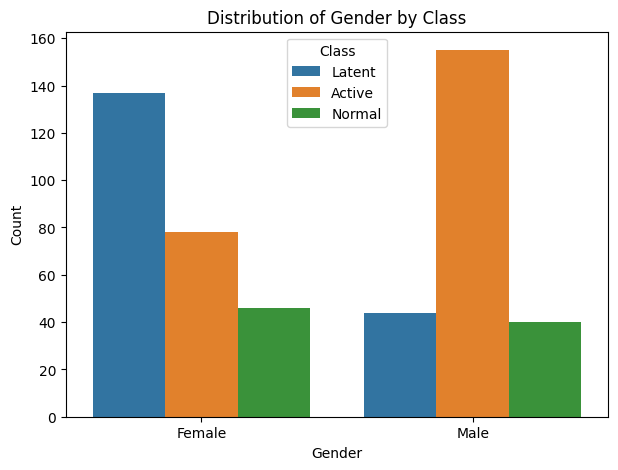

In [11]:
# Plotting the distribution of Gender
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Gender', hue='Class')
plt.title('Distribution of Gender by Class')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


<Figure size 700x700 with 0 Axes>

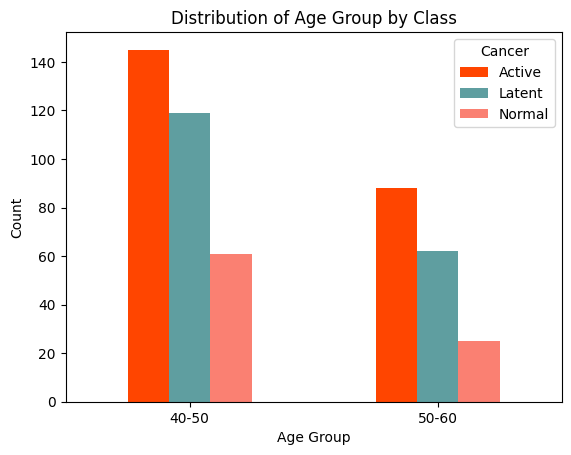

In [12]:
# age group and class

age_class_counts = pd.crosstab(df['Age_Group'], df['Class'])
plt.figure(figsize=(7, 7))
age_class_counts.plot(kind='bar', color=['orangered', 'cadetblue', 'salmon'])
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Age Group by Class')
plt.legend(title='Cancer', labels=['Active', 'Latent', 'Normal'])
plt.xticks(rotation = 0)
plt.show()

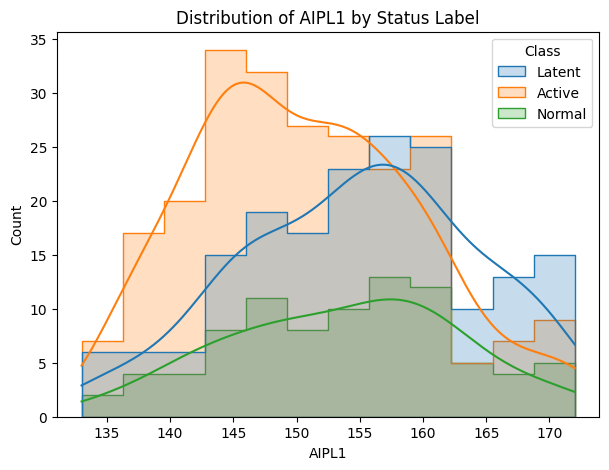

In [13]:
# Distribution plot for 'AIPL1'
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='AIPL1', hue='Class', kde=True, element="step")
plt.title('Distribution of AIPL1 by Status Label')
plt.show()

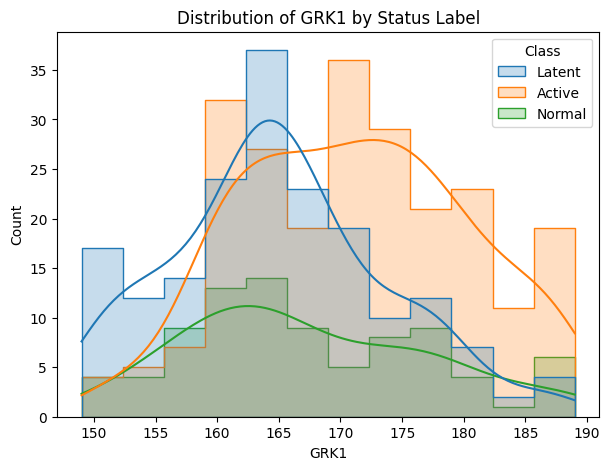

In [14]:
# Distribution plot for 'GRK1'
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='GRK1', hue='Class', kde=True, element="step")
plt.title('Distribution of GRK1 by Status Label')
plt.show()

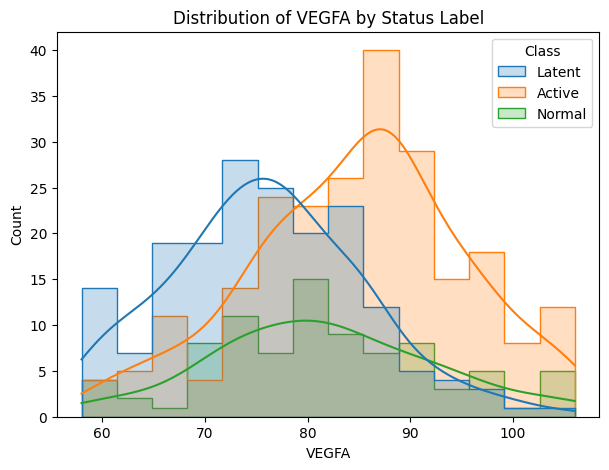

In [15]:
# Distribution plot for 'VEGFA'
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='VEGFA', hue='Class', kde=True, element="step")
plt.title('Distribution of VEGFA by Status Label')
plt.show()

In [16]:
# find the columns with outliers value
numerical_columns = df.select_dtypes(include=[np.number])

columns_with_outliers = []

for column in numerical_columns.columns:
    # Z-scores for the current column
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())

    # define a threshold
    threshold = 5

    if any(z_scores > threshold):
        columns_with_outliers.append(column)

print("Columns with outliers:", columns_with_outliers)

Columns with outliers: []


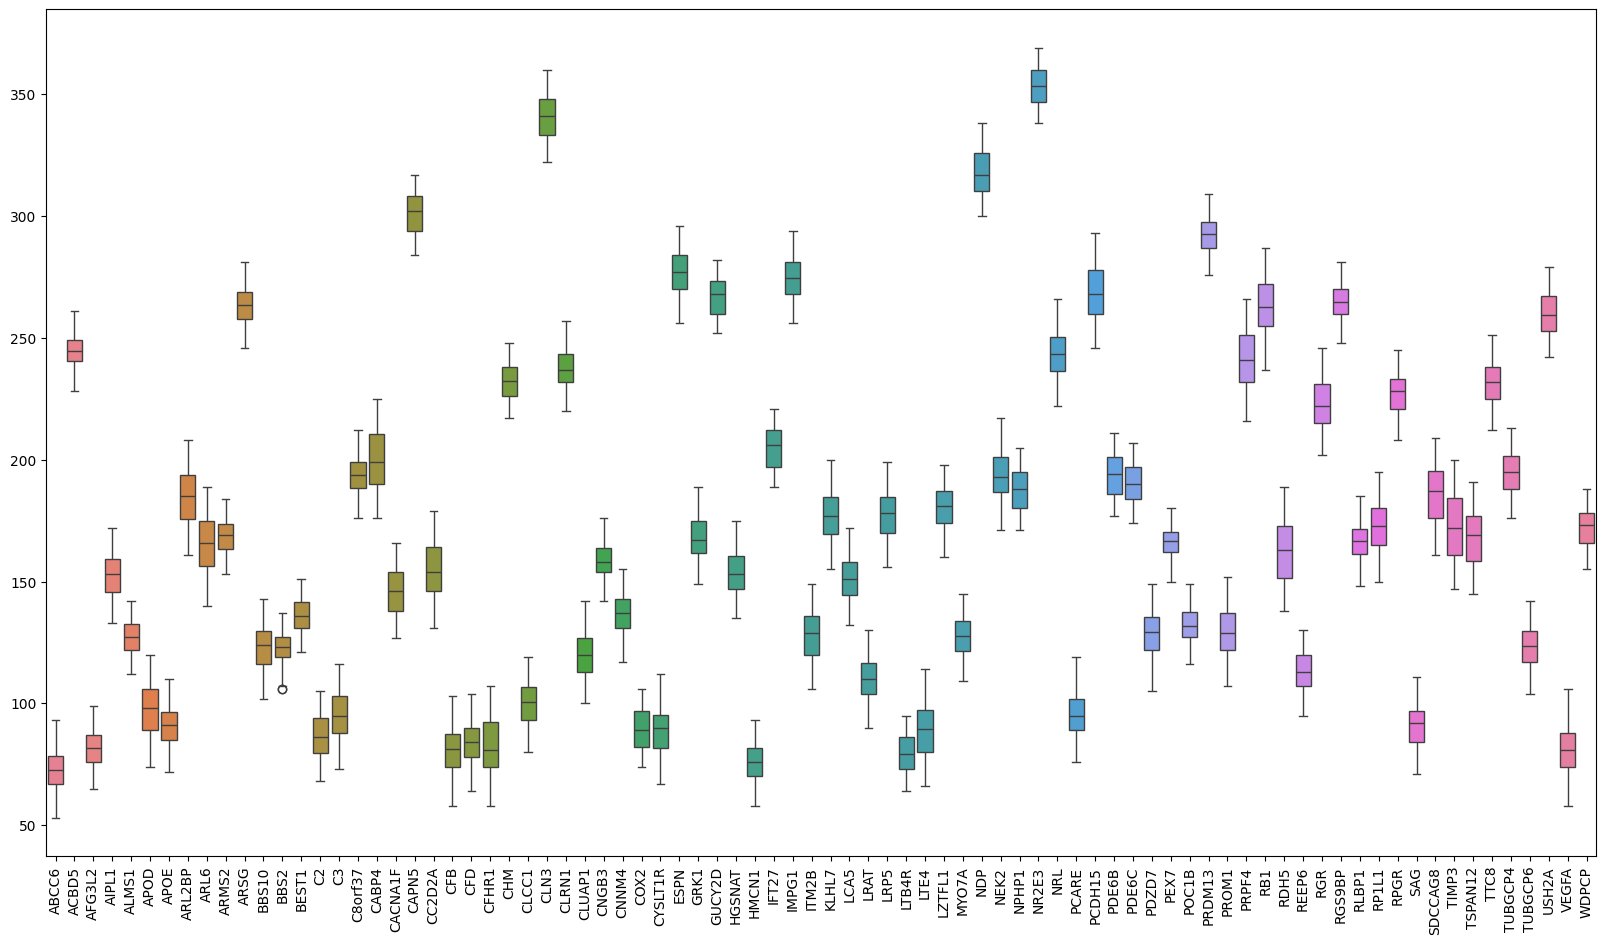

In [17]:
# outliers visualize

plt.figure(figsize=(20, 11))
sns.boxplot(data = df, orient='v')
plt.xticks(rotation=90)
plt.show()

In [18]:
df_1 = df.copy()

In [19]:
df_1 = df_1.drop(columns=['Samples'])     # removing the Samples id column

In [20]:
df_1['Gender'] = label.fit_transform(df_1['Gender'])    #transfrom the strings in numeric values
df_1['Gender'].unique()

df_1['Age_Group'] = label.fit_transform(df_1['Age_Group'])
df_1['Age_Group'].unique()



array([1, 0])

In [21]:
# Define the mapping
label_mapping = {
    'Normal': 0,
    'Active': 1,
    'Latent': 2
}

# Apply the mapping to the 'Class' column
df_1['Class'] = df_1['Class'].map(label_mapping)

# Verify the changes
print(df_1['Class'].value_counts())

Class
1    233
2    181
0     86
Name: count, dtype: int64


In [22]:
df_1

,Gender,Age_Group,ABCC6,ACBD5,AFG3L2,AIPL1,ALMS1,APOD,APOE,ARL2BP,...,SDCCAG8,TIMP3,TSPAN12,TTC8,TUBGCP4,TUBGCP6,USH2A,VEGFA,WDPCP,Class
0,0,1,64.6,253.0,92.0,151.0,114.0,104.2,95.6,183.0,...,192.0,156.4,163.2,220.0,182.0,124.0,275.0,73.0,165.0,2
1,0,1,76.0,239.0,76.8,150.0,120.0,104.2,86.0,204.0,...,203.0,159.0,145.0,228.4,200.0,113.0,251.0,67.0,159.0,2
2,0,0,55.0,257.0,79.8,144.0,131.0,117.0,97.8,197.0,...,198.0,159.0,174.0,231.0,188.0,136.0,255.0,72.0,162.0,2
3,0,0,70.0,228.0,72.0,145.0,140.0,104.0,96.0,178.0,...,183.0,164.2,153.4,236.4,188.0,119.0,260.4,71.0,184.0,2
4,0,1,74.2,250.8,67.0,161.6,113.0,92.0,95.2,187.0,...,194.8,160.0,172.0,226.6,196.0,117.0,257.0,68.0,170.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,1,79.6,241.0,78.6,147.0,121.6,83.4,78.0,191.0,...,191.0,180.2,165.0,243.0,201.6,118.0,258.2,87.0,174.0,1
496,1,0,78.0,247.4,72.0,153.2,124.6,75.0,85.0,189.0,...,175.8,186.0,171.4,241.0,201.0,112.0,256.0,88.4,166.0,1
497,1,1,79.4,260.0,87.6,139.0,125.8,89.0,81.0,172.0,...,170.0,174.0,190.0,229.4,197.8,131.0,256.0,96.0,162.0,1
498,1,0,74.6,240.0,80.0,136.0,142.0,88.0,88.4,167.2,...,189.0,182.0,172.0,238.0,198.4,104.0,259.0,78.0,181.0,2


In [23]:
X = df_1.drop('Class', axis=1)     # droping the target column
y = df_1['Class']                  # & put the target column in a variable y


In [24]:
# ## feature scaling using Standard Scaler/MinMaxScaler

# m_saler = MinMaxScaler()
# m_saler.fit(X)
# scaled_x = m_saler.transform(X)

In [25]:
## feature scaling using Standard Scaler/MinMaxScaler

s_saler = StandardScaler()
s_saler.fit(X)
scaled_x = s_saler.transform(X)

In [26]:
# split the dataset into training (80%) and testing (20%) set
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.20, random_state=0)

In [27]:
# Support Vector Machine
from sklearn.svm import SVC

# Create an SVM classifier
svm_clf = SVC(kernel='rbf', random_state=0)  # Using radial basis function (RBF) kernel, can be changed as needed

# Train the SVM classifier
svm_model = svm_clf.fit(X_train, y_train)

# Make predictions on the test set
svm_pred = svm_model.predict(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_pred) * 100
svm_accuracy = "{:.2f}".format(svm_accuracy)
print("Accuracy of SVM:", svm_accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, svm_pred))


Accuracy of SVM: 72.00
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.70      0.94      0.80        49
           2       0.76      0.72      0.74        36

    accuracy                           0.72       100
   macro avg       0.49      0.55      0.51       100
weighted avg       0.62      0.72      0.66       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rf_m = rfc.fit(X_train, y_train)
rf_pred = rf_m.predict(X_test)
rf_as = accuracy_score(y_test, rf_pred) * 100
rf_as = "{:.2f}".format(rf_as)
print("Accuracy of RF:", rf_as)

print("Classification Report:")
print(classification_report(y_test, rf_pred))

Accuracy of RF: 64.00
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.68      0.78      0.72        49
           2       0.59      0.72      0.65        36

    accuracy                           0.64       100
   macro avg       0.42      0.50      0.46       100
weighted avg       0.55      0.64      0.59       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lgc = LogisticRegression()
lg_m = lgc.fit(X_train, y_train)
lg_pred = lg_m.predict(X_test)
lgc_as = accuracy_score(y_test, lg_pred) * 100
lgc_as = "{:.2f}".format(lgc_as)
print('Accuracy of LG:', lgc_as)

print("Classification Report:")
print(classification_report(y_test, lg_pred))

Accuracy of LG: 70.00
Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.33      0.26        15
           1       0.83      0.78      0.80        49
           2       0.87      0.75      0.81        36

    accuracy                           0.70       100
   macro avg       0.64      0.62      0.62       100
weighted avg       0.75      0.70      0.72       100



In [30]:
# XGBoost
from xgboost import XGBClassifier
xgc = XGBClassifier()
xgc_m = xgc.fit(X_train, y_train)
xgc_pred = xgc_m.predict(X_test)
xg_as = accuracy_score(y_test, xgc_pred) * 100
xg_as = "{:.2f}".format(xg_as)
print("Accuracy of XGBoost:", xg_as)

print("Classification Report: ")
print(classification_report(y_test, xgc_pred))

Accuracy of XGBoost: 67.00
Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.71      0.86      0.78        49
           2       0.66      0.69      0.68        36

    accuracy                           0.67       100
   macro avg       0.46      0.52      0.48       100
weighted avg       0.59      0.67      0.62       100



In [31]:
from sklearn.ensemble import VotingClassifier
two_cla = VotingClassifier(estimators=[('RF', rfc), ('LGR', lgc)], voting='soft')
two_cla.fit(X_train, y_train)
pred = two_cla.predict(X_test)
print('Accuracy: %.2f' % (accuracy_score(y_test, pred) * 100))
print(classification_report(y_test, pred))

Accuracy: 74.00
              precision    recall  f1-score   support

           0       0.25      0.27      0.26        15
           1       0.81      0.88      0.84        49
           2       0.87      0.75      0.81        36

    accuracy                           0.74       100
   macro avg       0.64      0.63      0.64       100
weighted avg       0.75      0.74      0.74       100



In [32]:
from sklearn.ensemble import VotingClassifier
two_cla_1 = VotingClassifier(estimators=[('LGR', lgc), ('XGB', xgc)], voting='soft')
two_cla_1.fit(X_train, y_train)
pred_1 = two_cla_1.predict(X_test)
print('Accuracy: %.2f' % (accuracy_score(y_test, pred_1) * 100))
print(classification_report(y_test, pred_1))

Accuracy: 77.00
              precision    recall  f1-score   support

           0       0.25      0.13      0.17        15
           1       0.78      0.96      0.86        49
           2       0.88      0.78      0.82        36

    accuracy                           0.77       100
   macro avg       0.64      0.62      0.62       100
weighted avg       0.74      0.77      0.75       100



Confusion matrix of LR & XGB


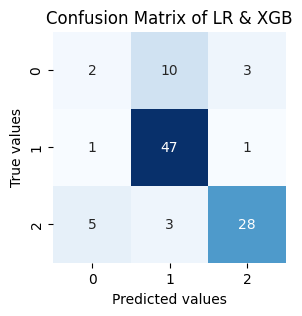

In [33]:
print('Confusion matrix of LR & XGB')

cm = confusion_matrix(y_test, pred_1)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.title("Confusion Matrix of LR & XGB")
plt.show()

In [34]:
# feature importances from random forest model
feature_importances = rf_m.feature_importances_

# the target variable is excluded when constructing the DataFrame
feature_importance_df = pd.DataFrame({'Feature': df.columns[1:-1], 'Importance': feature_importances})

# convert the importance scores to percentages
feature_importance_df['Importance (%)'] = feature_importance_df['Importance'] * 100

# sort the DataFrame by feature importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top 15 important features
print("Top 15 Important Features:")
print(feature_importance_df.head(15).to_string(index=False))


Top 15 Important Features:
Feature  Importance  Importance (%)
     C2    0.031117        3.111718
   APOE    0.029328        2.932753
  TIMP3    0.026259        2.625879
  VEGFA    0.024338        2.433769
  KLHL7    0.022715        2.271463
  CFHR1    0.021035        2.103494
   PEX7    0.020749        2.074899
  PRPF4    0.018888        1.888783
  PDE6B    0.018356        1.835587
  PCARE    0.018184        1.818435
  RP1L1    0.015985        1.598514
  ACBD5    0.015949        1.594852
  MYO7A    0.015647        1.564710
C8orf37    0.015422        1.542237
    SAG    0.015396        1.539571


<ipython-input-35-5428fad6c714>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance (%)', y='Feature', data=feature_importance_df.head(15), palette='viridis')


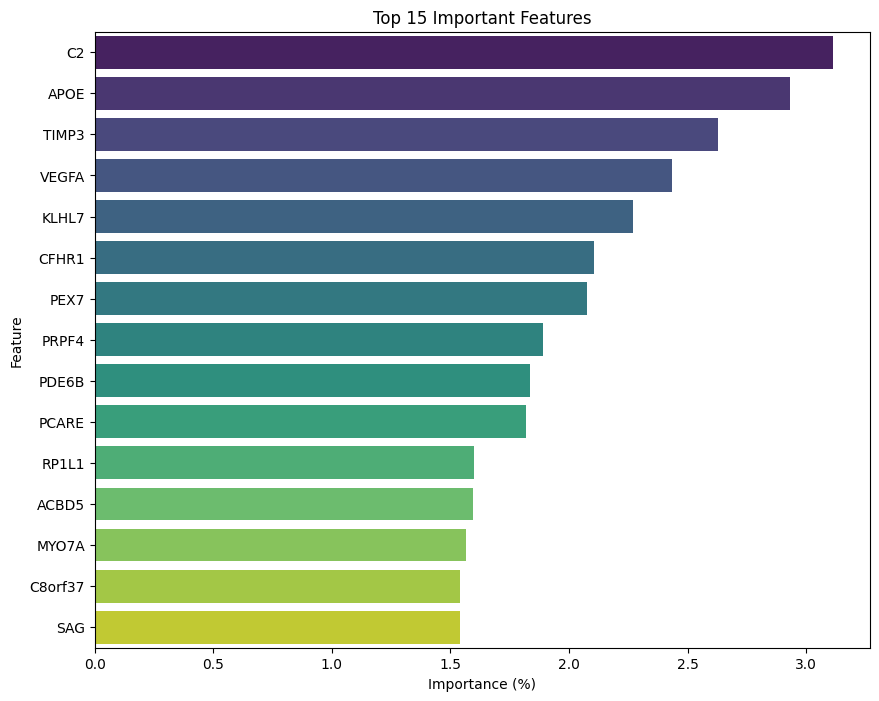

In [35]:
# Plot the top 15 important features
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance (%)', y='Feature', data=feature_importance_df.head(15), palette='viridis')
plt.title('Top 15 Important Features')
plt.xlabel('Importance (%)')
plt.ylabel('Feature')
plt.show()